# Test Chi2 como prueba de independencia de variables. 

El objetivo es saber si existe una relacion entre la predictora y el target mas alla de lo que razonablemente podria producir el azar.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from scipy.stats import chi2_contingency

In [26]:
df = pd.read_csv("../datasets/titanic.csv")
df = df[["Sex", "Survived"]]

In [27]:
df_observed = pd.crosstab(df['Survived'], df['Sex'])

In [28]:
chi2, p, dof, expected = chi2_contingency(df_observed)
# Convertir los resultados esperados a un DataFrame
df_expected = pd.DataFrame(expected, index=df_observed.index, columns=df_observed.columns)


In [29]:
df_expected

Sex,female,male
Survived,,
0,193.474747,355.525253
1,120.525253,221.474747


In [30]:
print("Tabla Observada:")
print(df_observed)
print("\nTabla Esperada:")
print(df_expected)
print(f"\nValor chi-cuadrado: {chi2}")
print(f"p-valor: {p}")

Tabla Observada:
Sex       female  male
Survived              
0             81   468
1            233   109

Tabla Esperada:
Sex           female        male
Survived                        
0         193.474747  355.525253
1         120.525253  221.474747

Valor chi-cuadrado: 260.71702016732104
p-valor: 1.1973570627755645e-58


Nota: Se calculó manualmente como comprobación, número ronda los 261 aproximadamente, se comprueba el resultado entregado por scipy.stats. Se pueden obtener resultados similares via remuestreo.

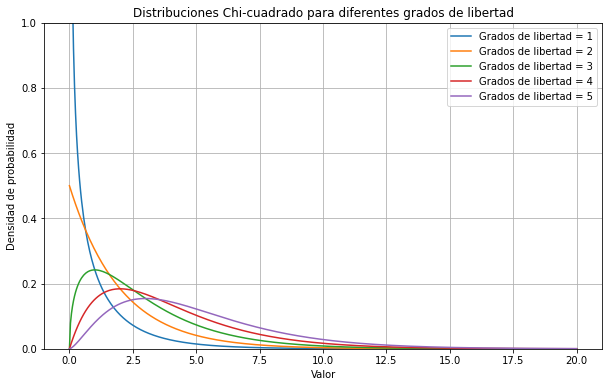

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Configuración de grados de libertad
df_values = [1, 2, 3, 4, 5]
x = np.linspace(0, 20, 500)  # Rango de valores x

# Crear la figura
plt.figure(figsize=(10, 6))

# Dibujar la distribución chi-cuadrado para cada grado de libertad
for df in df_values:
    plt.plot(x, chi2.pdf(x, df), label=f"Grados de libertad = {df}")

# Personalización del gráfico
plt.title("Distribuciones Chi-cuadrado para diferentes grados de libertad")

plt.xlabel("Valor")
plt.ylim(0, 1)  # Limitar el eje y a un máximo de 1
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


# Ejercicio: desarrollar un test estadistico para rechazar o aceptar la hipotesis nula de independencia de variables para Pclass vs survived